#**EDAB6808 Assignment 3 (Group 1): Demographic Profiling of Purchase Intent Using Probabilistic Models**

**Group Members:**

Lethabo Phalime 2020264244

Melissa Mlotshwa 2021276346

**B.Com Hons Business and Financial Analytics (Hons), University of the Free State**  

**Due Date: 15 October 2025**  


---

####**Objective**

The primary objective is to determine which combinations of demographic variables are most likely to result in each of the four purchase intention types. This is achieved by performing conditional probability inference on both the balanced and unbalanced Bayesian networks developed in Assignment 2.


####**Hypothesis Statement (H0)**

Based on preliminary analysis, we hypothesise that: Older, less educated females are the most likely demographic profile to exhibit a high purchase intention (likely to make a purchase). This hypothesis will be tested using Bayesian network inference across all demographic combinations.

---

####**Notebook Outline**

1. Initial Installation and Setup of Packages
2. Understanding the Data Context and Setup
3. Probability Analysis (Inference)
4. Critical Reflection and Insights

---

**Disclaimer:** AI (ChatGPT and Gemini AI) was used responsibly in the assignment as a means to improve the quality of the work and code, with human oversight and critical evaluation ensuring adherence to academic standards and originality.




##**Phase 1: Initial Installation & Setup of Packages**

**Description:** All the relevant packages for this entire assessment are installed and imported in this section of the assignment.


In [ ]:
!pip install -q statsmodels

In [ ]:
!pip install bnlearn pandas numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.4/190.4 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 3.7 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659682 sha256=65355c042e37d77e8922ff1382772f0a8182a45579607458e3bd5e06ec4916c6
  Stored in directory: /root/.cache/pip/wheels/c6/24/8b/be911b059a61f490f38425eb19bf2fed470a5ead97228e8255
Successfully built semopy


In [ ]:
#Install Required Packages
!pip install -q pandas numpy matplotlib seaborn networkx imbalanced-learn scikit-learn pingouin factor_analyzer pgmpy bnlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 9.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from itertools import product
import bnlearn as bn # Import bnlearn

In [ ]:
from google.colab import files
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [ ]:
!pip install -q statsmodels

In [ ]:
#Statistical Analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from scipy.stats import chi2_contingency, spearmanr
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from factor_analyzer import (FactorAnalyzer, calculate_bartlett_sphericity, calculate_kmo)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

##**Phase 2: Understanding the Data Context**

---

###**Assignment 2 Overview and Recap**

The original dataset was sourced from the **Data in Brief publication on Soweto subsistence retail**. For modeling purposes, we have loaded:

- The **cleaned and categorised dataset** used to build the initial Bayesian Networks.
- The **pickled Bayesian Network models** from both the imbalanced and synthetically balanced datasets (ML-Imputation, SMOTE, GAN).

**The workflow in this phase includes:**



1. Importing and loading the datasets and pickled models.
2. Visualisition of the imported Bayesian networks.
3. Recap of Assignment 2 Outputs and Justifications
4. Preparing and analysing demographic combinations.
5. Descriptive and advanced statistics to understand feature distributions and justify feature selection.


###**Importing Datasets and Pickled Models**

In [ ]:
#Prompt to upload the required files from drive
uploaded = files.upload()

Saving soweto_retail_data_unprocessed.pkl to soweto_retail_data_unprocessed.pkl
Saving smote_bn_model.pkl to smote_bn_model (1).pkl
Saving raw_bn_model.pkl to raw_bn_model (1).pkl
Saving ml_bn_model.pkl to ml_bn_model (1).pkl
Saving gan_bn_model.pkl to gan_bn_model (1).pkl
Saving soweto_retail_data_final.pkl to soweto_retail_data_final (1).pkl


In [ ]:
#Load the Raw Imbalanced model
with open('raw_bn_model.pkl', 'rb') as f:
    raw_model = pickle.load(f)

#Load the ML Balanced model
with open('ml_bn_model.pkl', 'rb') as f:
    ml_model = pickle.load(f)

#Load the SMOTE Balanced model
with open('smote_bn_model.pkl', 'rb') as f:
    smote_model = pickle.load(f)

#Load the GAN Balanced model
with open('gan_bn_model.pkl', 'rb') as f:
    gan_model = pickle.load(f)

#Load the cleaned and categorised dataset
with open('soweto_retail_data_final.pkl', 'rb') as f:
    soweto_retail_data_final = pickle.load(f)

#Load the unprocessed raw dataset
with open('soweto_retail_data_unprocessed.pkl', 'rb') as f:
    soweto_retail_data_unprocessed = pickle.load(f)



###**Visualisation of Imported Bayesian Networks**

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


<Figure size 1200x800 with 0 Axes>

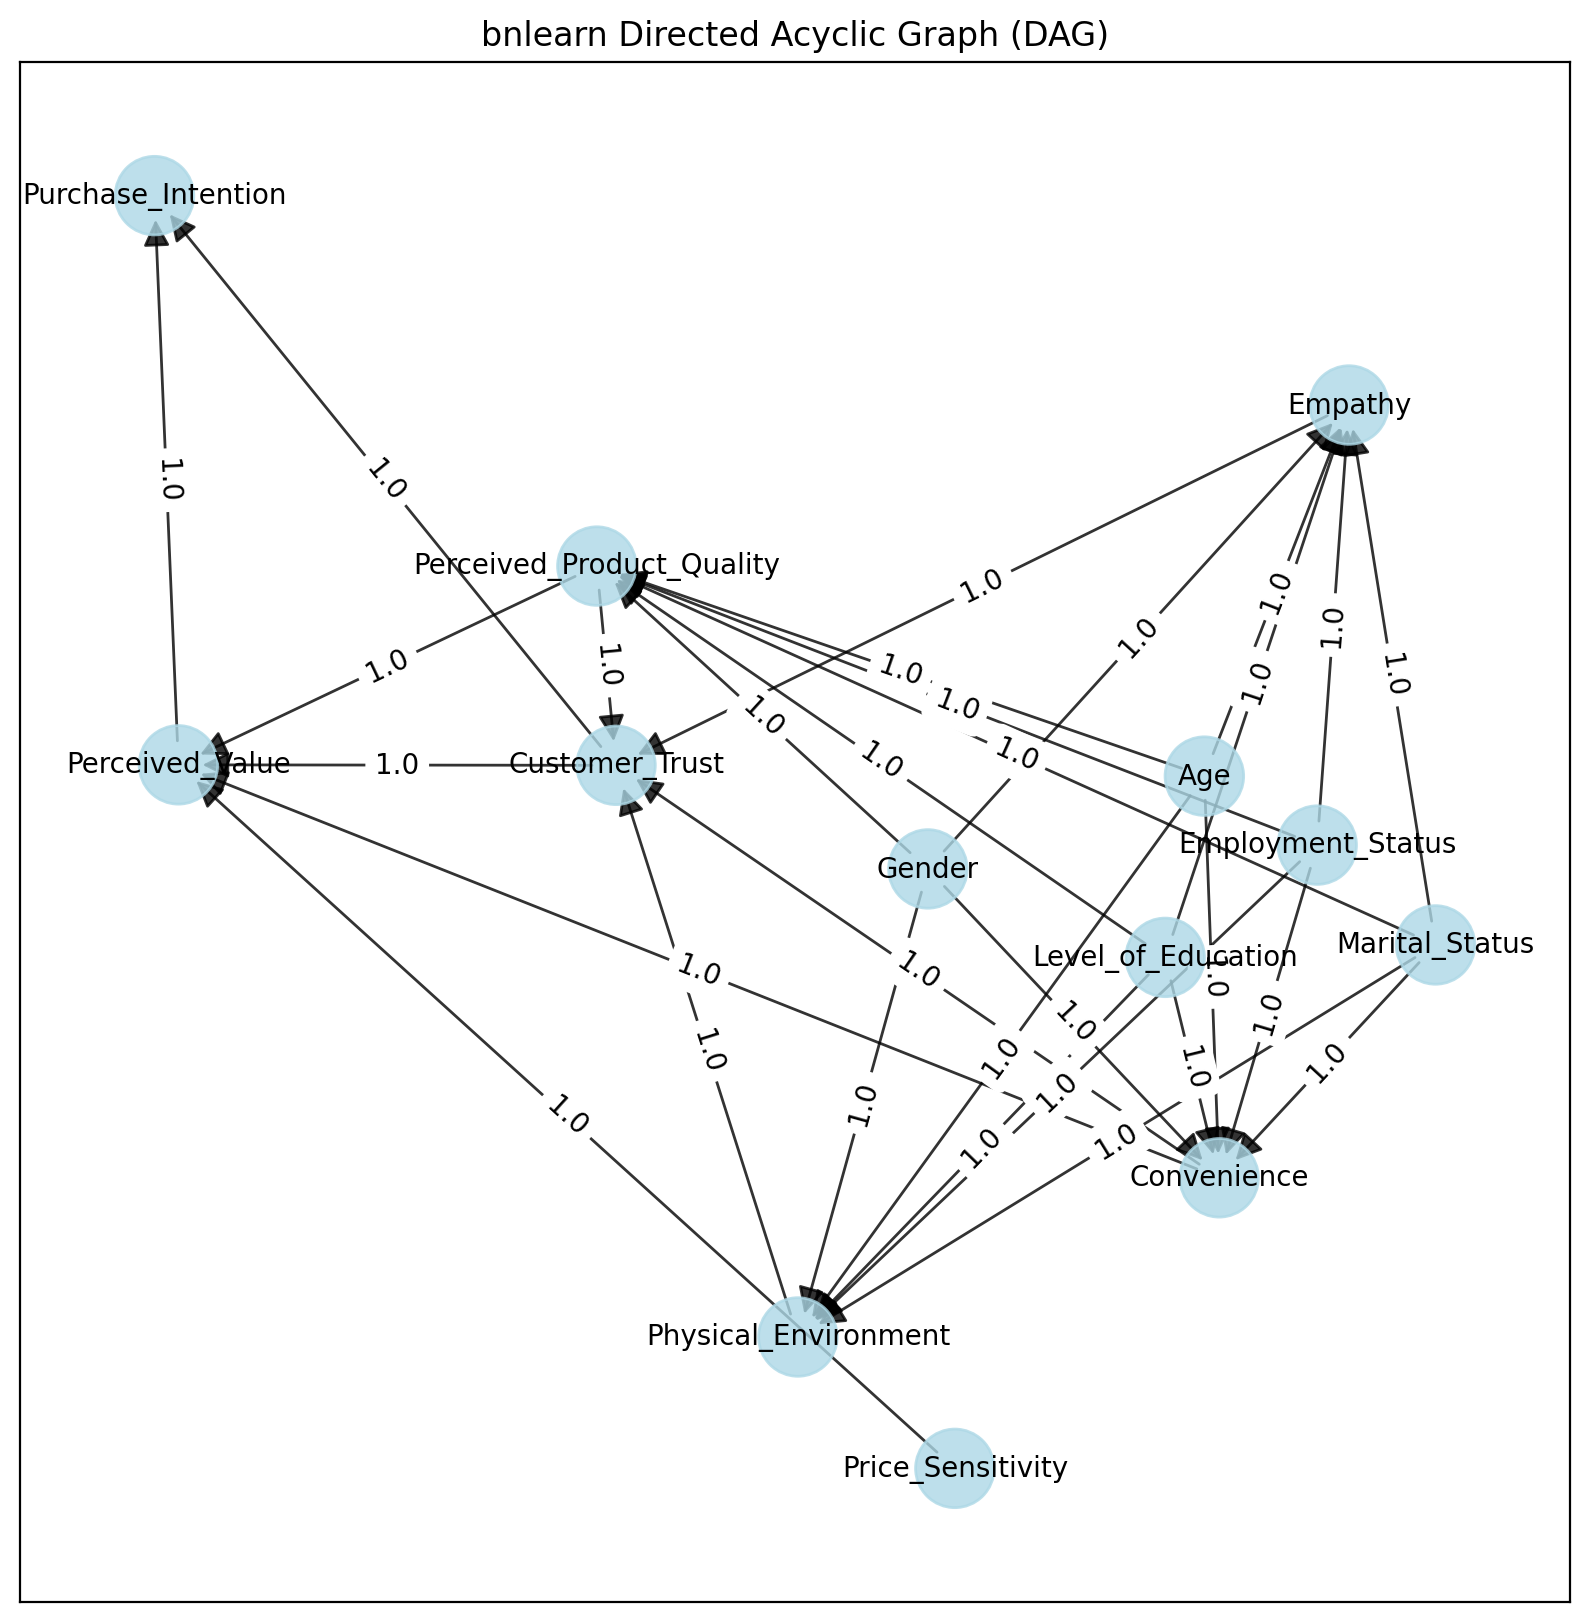

In [ ]:
#Plot the raw DAG to verify
plt.figure(figsize=(12,8))
bn.plot(raw_model)
plt.show()

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


<Figure size 1200x800 with 0 Axes>

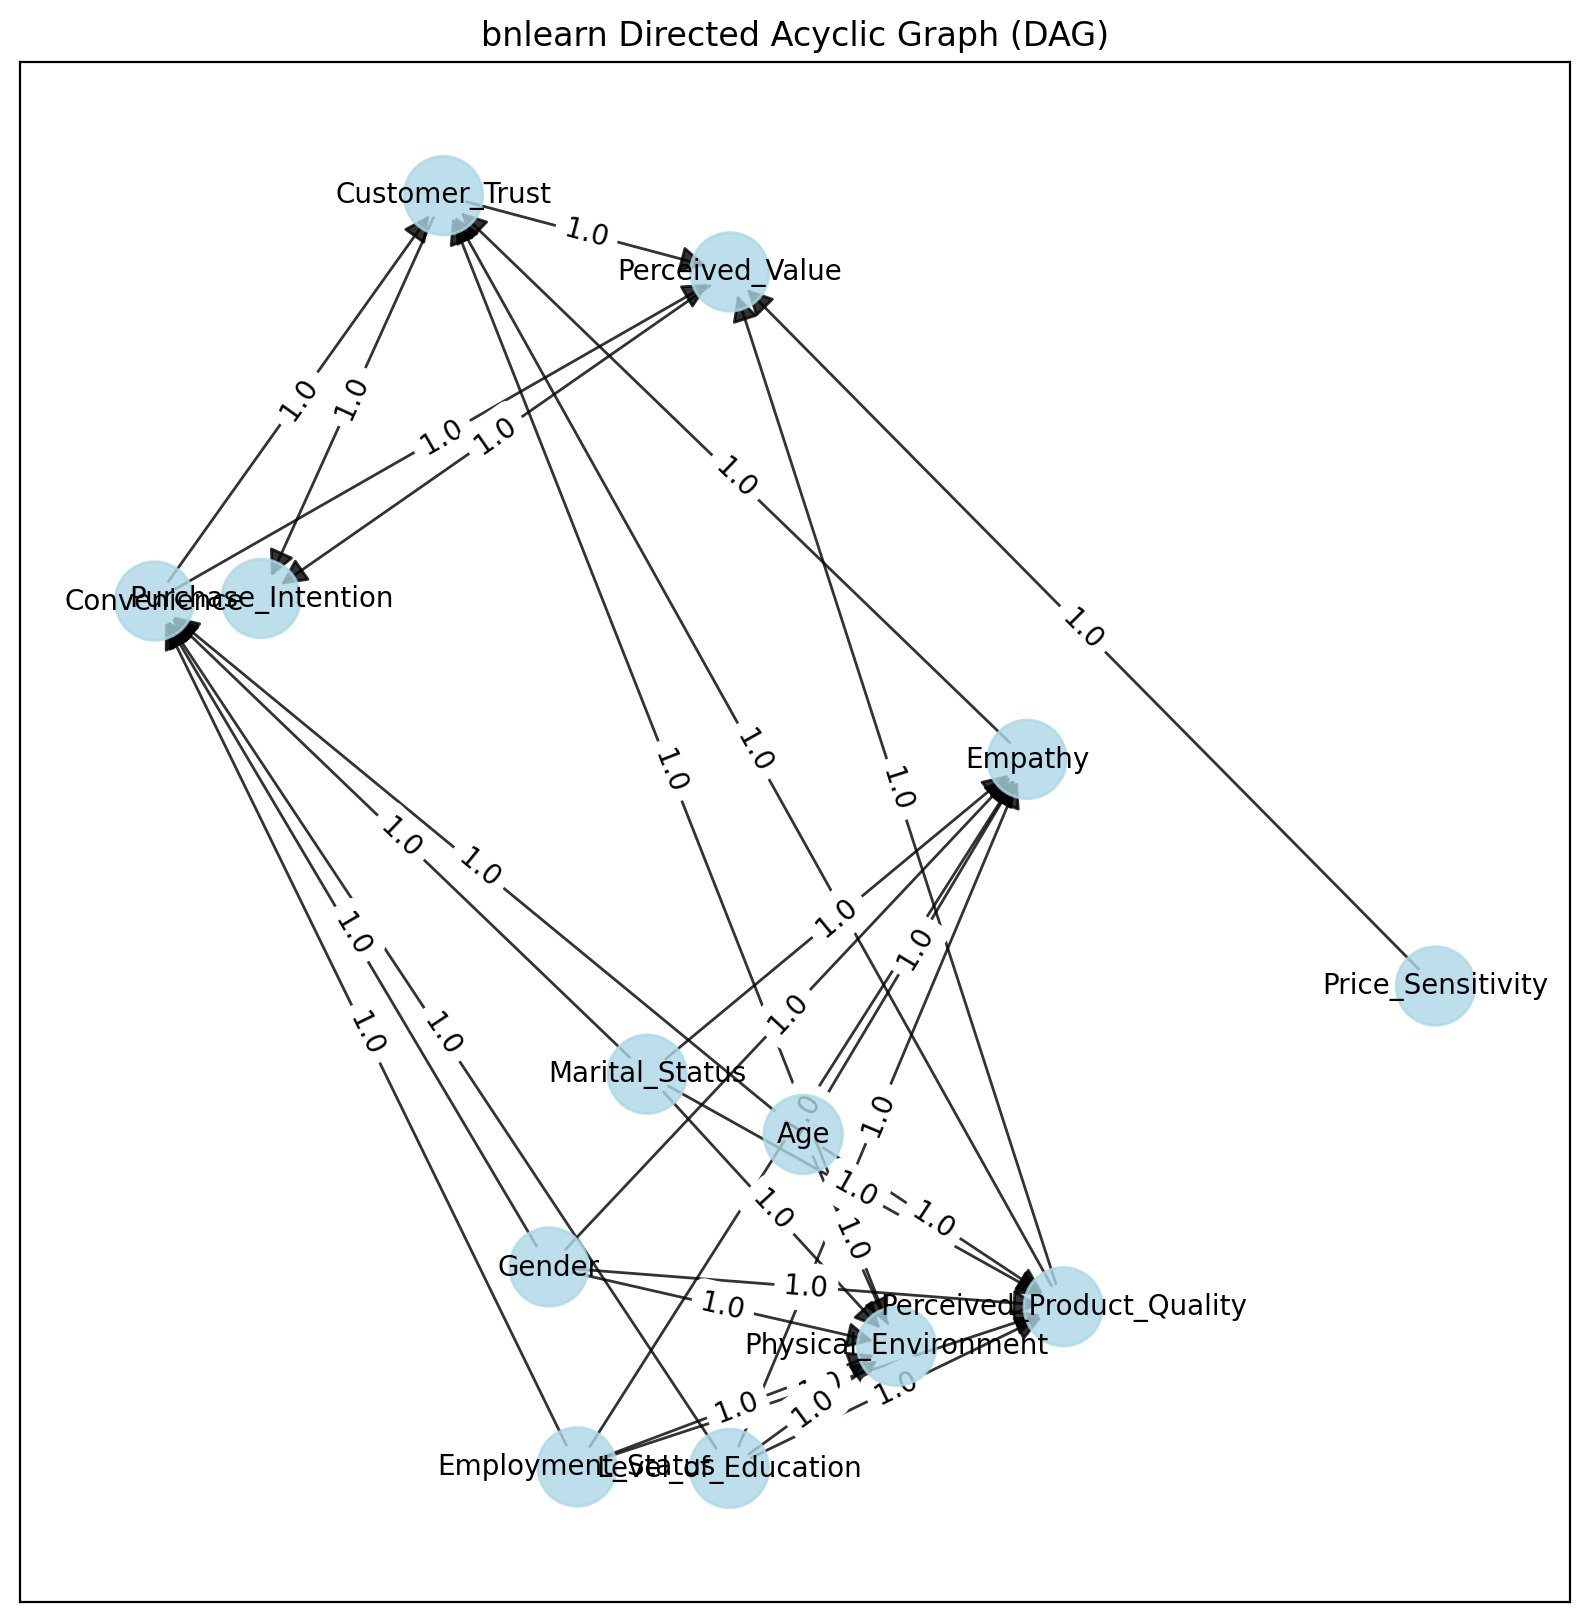

In [ ]:
#Plot the SMOTE DAG to verify
plt.figure(figsize=(12,8))
bn.plot(smote_model)
plt.show()

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


<Figure size 1200x800 with 0 Axes>

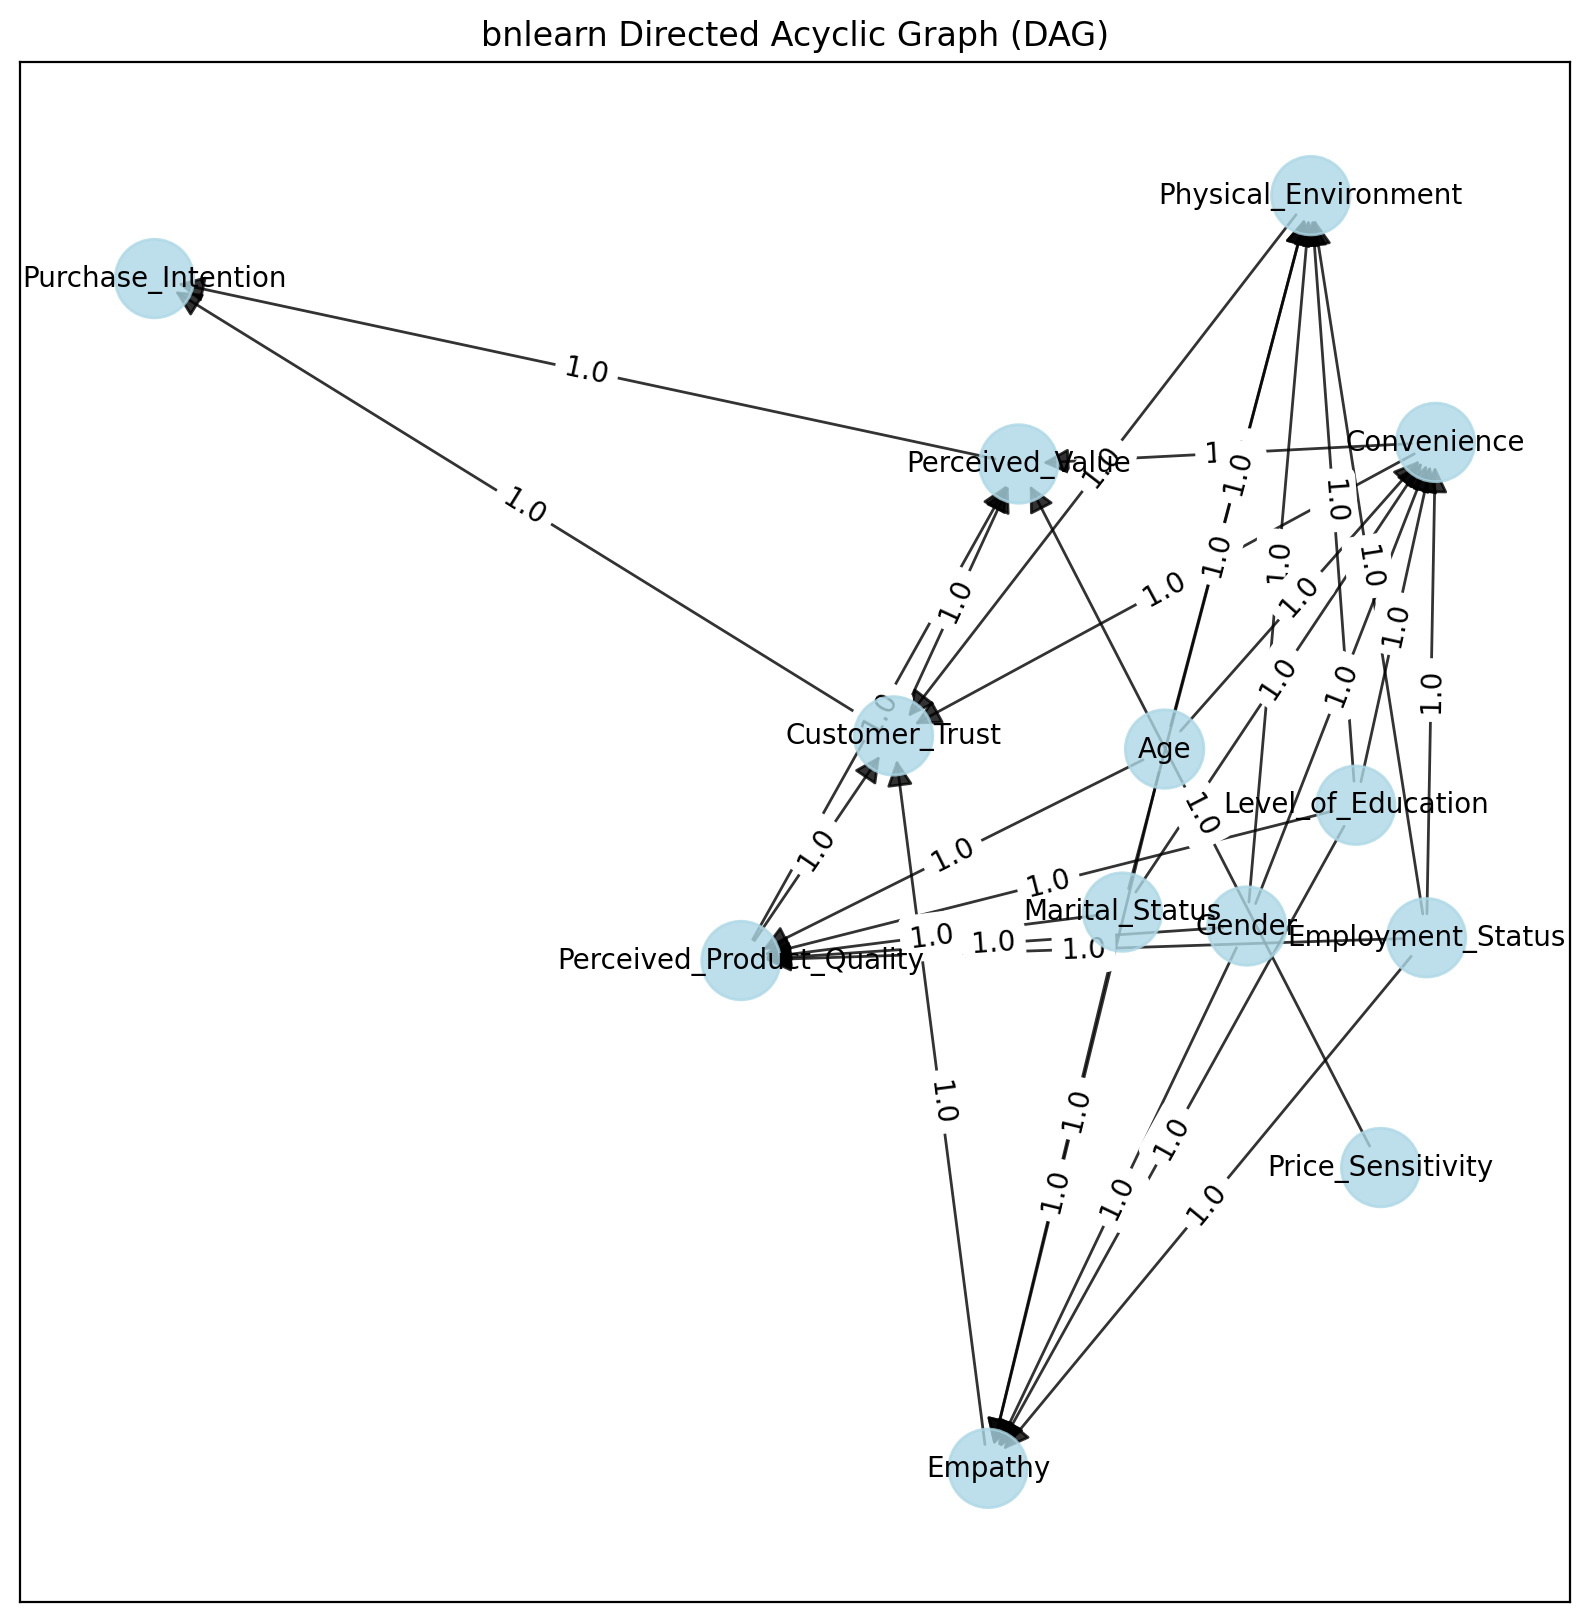

In [ ]:
#Plot the GAN DAG to verify
plt.figure(figsize=(12,8))
bn.plot(gan_model)
plt.show()

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


<Figure size 1200x800 with 0 Axes>

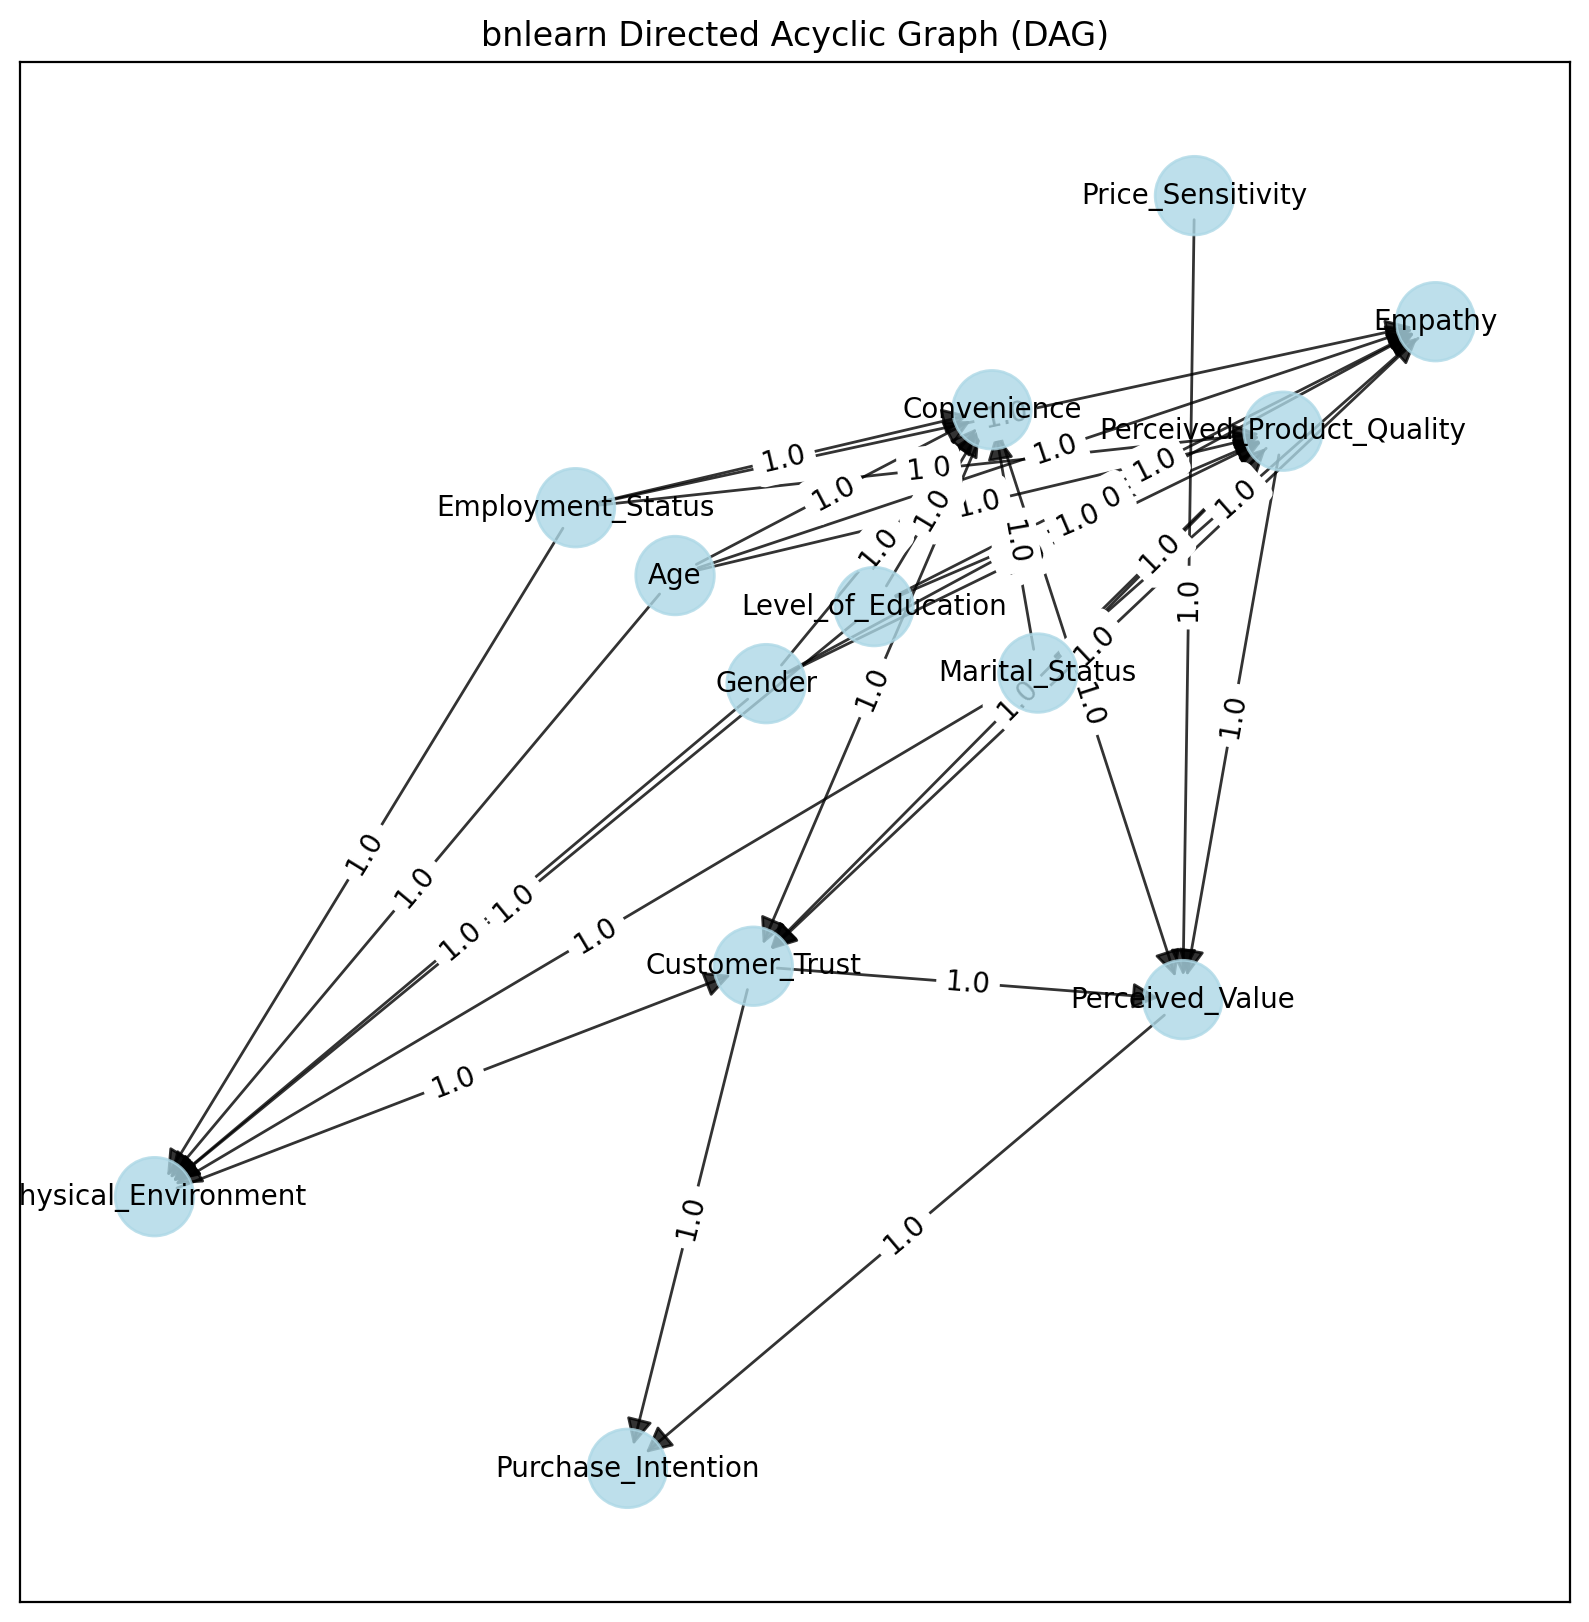

In [ ]:
#Plot the ML Imputation DAG to verify
plt.figure(figsize=(12,8))
bn.plot(ml_model)
plt.show()

###**Recap of Assignment 2 Outputs and Justifications**

This section provides an overall recap and review of the key outputs and justifications for Assignment 2 as follows:

1. Representation of the preprocessed clean dataset
2. Recap from how the dataset was engineered


####**Representation of the preprocessed clean dataset**

---

**Cleaned Dataset Overview**

The cleaned dataset was preprocessed in Assignment 2 by transforming Likert-scale variables into categorical variables, making them suitable for Bayesian Network modeling and inference.

For the construct variables, individual survey items were aggregated into composite scores. For example, the *Empathy* construct was calculated as the mean of *E1, E2, and E3*.

These numeric composites were then converted into categorical labels using a scale range (**which was derived from the descriptive statistics ~ minimum and maximum values**), such as *Low Empathy, Moderate Empathy, and High Empathy*. Similarly, other constructs were categorised into 3 or 4 meaningful levels to improve interpretability.

After preprocessing, the dataset was reduced to 281 entries with 13 columns, all of which were categorical, ready for modeling and inference with Bayesian Networks.

Along with the feature engineering that took place, Regular Customer and Shopping frequency were removed due to low correlation with other demographics, reducing multicollinearity and simplifying the BN.

This is why it was just to remove them:

1. Low predictive value: If these variables had weak correlations with other demographics or with the target (Purchase Intention), they add little information to the Bayesian Network.

2. Reduce complexity: Dropping them reduces the number of nodes in our BN, which improves interpretability and reduces computational cost.

2. Consistency: Following our previous workflow ensures your results and comparisons (imbalanced vs. balanced datasets) remain consistent.


In [ ]:
#call onto your clean dataset that was imported
soweto_retail_data_final.head()

,Gender,Age,Marital_Status,Employment_Status,Level_of_Education,Empathy,Convenience,Price_Sensitivity,Physical_Environment,Perceived_Product_Quality,Customer_Trust,Perceived_Value,Purchase_Intention
0,I prefer not to say,35-49,Single,Employed,Degree,Moderate Empathy,Moderate Convenience,Moderate Price Sensitivity,Average Environment,Moderate Quality,Moderate Trust,Moderate Value,High Intention
1,I prefer not to say,50-65,I prefer not to say,Employed,Degree,Moderate Empathy,High Convenience,Moderate Price Sensitivity,Average Environment,Moderate Quality,Moderate Trust,Moderate Value,High Intention
2,Female,35-49,Married,Unemployed,Basic education,Moderate Empathy,Moderate Convenience,Moderate Price Sensitivity,Average Environment,Moderate Quality,Moderate Trust,Low Value,High Intention
3,Male,29-35,Single,Employed,Diploma,Moderate Empathy,Moderate Convenience,High Price Sensitivity,Average Environment,Moderate Quality,Moderate Trust,Low Value,High Intention
4,I prefer not to say,23-28,Single,Unemployed,Basic education,Moderate Empathy,Moderate Convenience,Moderate Price Sensitivity,Average Environment,Moderate Quality,Moderate Trust,Moderate Value,Low Intention


In [ ]:
#display info of clean dataset
soweto_retail_data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Gender                     281 non-null    category
 1   Age                        281 non-null    category
 2   Marital_Status             281 non-null    category
 3   Employment_Status          281 non-null    category
 4   Level_of_Education         281 non-null    category
 5   Empathy                    281 non-null    category
 6   Convenience                281 non-null    category
 7   Price_Sensitivity          281 non-null    category
 8   Physical_Environment       281 non-null    category
 9   Perceived_Product_Quality  281 non-null    category
 10  Customer_Trust             281 non-null    category
 11  Perceived_Value            281 non-null    category
 12  Purchase_Intention         281 non-null    category
dtypes: category(13)
memory usage: 4.0 K

###**Recap from how the dataset was engineered**

---
**Raw Dataset and Preprocessing**

As mentioned in the previous section, the original dataset consists of survey responses collected from subsistence retail customers in Soweto.

Prior to the preprocessing, a comprehensive Exploratory Data Analysis was performed to determine the underlying relationships between the variables.

It still contains all raw Likert-scale items for various constructs, as well as demographic information such as Gender, Marital Status, Age, Level of Education, Employment Status, Type of Customer, and Shopping Frequency.

This dataset provides the unprocessed baseline, capturing all variability in the responses before any transformations, imputations, or aggregations were applied. It originally included more variables and survey items than the final cleaned dataset, making it suitable for exploratory analysis, imbalance assessment, and feature significance evaluation.

The recap of how it was preprocessed can be found below:


In [ ]:
#This is the raw dataset
soweto_retail_data_unprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Gender              281 non-null    int64
 1   Age                 281 non-null    int64
 2   Marital Status      281 non-null    int64
 3   Employment Status   281 non-null    int64
 4   Level of Education  281 non-null    int64
 5   Regular Customer    281 non-null    int64
 6   Shopping frequency  281 non-null    int64
 7   E1                  281 non-null    int64
 8   E2                  281 non-null    int64
 9   E3                  281 non-null    int64
 10  E4                  281 non-null    int64
 11  C1                  281 non-null    int64
 12  C2                  281 non-null    int64
 13  C3                  281 non-null    int64
 14  PS1                 281 non-null    int64
 15  PS2                 281 non-null    int64
 16  PS3                 281 non-null    int64
 1

In [ ]:
#Preview the 1st rows of the dataset
soweto_retail_data_unprocessed.head()

,Gender,Age,Marital Status,Employment Status,Level of Education,Regular Customer,Shopping frequency,E1,E2,E3,...,CT5,CT6,CT7,PV1,PV2,PV3,PI1,PI2,PI3,PI4
0,3,4,1,1,4,2,3,3,2,4,...,3,2,4,2,4,4,3,4,4,4
1,3,5,3,1,4,1,1,3,3,3,...,2,4,3,2,3,2,4,4,4,4
2,2,4,2,2,2,2,2,3,4,2,...,2,4,1,2,3,1,3,3,4,3
3,1,3,1,1,3,2,1,3,2,4,...,2,3,4,1,2,3,3,4,3,4
4,3,2,1,2,2,2,3,2,4,3,...,2,4,2,2,4,2,2,3,2,3


In [ ]:
#Preview the last 5 rows of the dataset
soweto_retail_data_unprocessed.tail()

,Gender,Age,Marital Status,Employment Status,Level of Education,Regular Customer,Shopping frequency,E1,E2,E3,...,CT5,CT6,CT7,PV1,PV2,PV3,PI1,PI2,PI3,PI4
276,1,3,1,2,3,1,2,2,3,2,...,2,3,5,3,3,4,4,4,5,4
277,2,3,3,1,2,1,1,5,4,2,...,1,1,5,2,1,5,4,4,3,4
278,2,4,3,1,3,1,2,5,5,3,...,4,4,4,4,4,4,4,5,5,5
279,2,5,2,2,3,1,1,3,3,3,...,3,3,3,3,3,4,4,4,4,4
280,2,5,1,1,2,1,1,5,5,5,...,5,4,5,4,3,5,4,5,4,5


In [ ]:
#Basic dataset information
print(f"Dataset Dimensions: {soweto_retail_data_unprocessed.shape}")
print(f"Number of features/variables: {soweto_retail_data_unprocessed.shape[1]}")
print(f"Number of observations: {soweto_retail_data_unprocessed.shape[0]}")

Dataset Dimensions: (281, 41)
Number of features/variables: 41
Number of observations: 281


####**Descriptive Statistics & Distributions**


In [ ]:
demographics = ['Gender', 'Marital Status', 'Age', 'Level of Education', 'Employment Status',
                'Regular Customer', 'Shopping frequency']

In [ ]:
# Select only the demographic columns
demographic_data = soweto_retail_data_unprocessed[demographics]

# Display advanced statistics for these columns
print("\nAdvanced Statistics (Mean, Median, Std, Skewness, Kurtosis) for Demographics:")
stats_summary = pd.DataFrame({
    'Mean': demographic_data.mean(numeric_only=True),
    'Median': demographic_data.median(numeric_only=True),
    'Std': demographic_data.std(numeric_only=True),
    'Skewness': demographic_data.skew(numeric_only=True),
    'Kurtosis': demographic_data.kurtosis(numeric_only=True),
})

display(stats_summary)


Advanced Statistics (Mean, Median, Std, Skewness, Kurtosis) for Demographics:


,Mean,Median,Std,Skewness,Kurtosis
Gender,1.576512,2.0,0.587382,0.445059,-0.687943
Marital Status,1.551601,1.0,0.720867,0.912822,-0.524341
Age,2.836299,3.0,1.417329,0.171141,-1.303520
Level of Education,2.491103,2.0,0.945342,0.383425,-0.553210
Employment Status,1.476868,1.0,0.500356,0.093124,-2.005654
Regular Customer,1.174377,1.0,0.380110,1.725588,0.984610
Shopping frequency,2.185053,2.0,1.268263,0.853749,-0.346172


####**Distribution plots for Demographics**

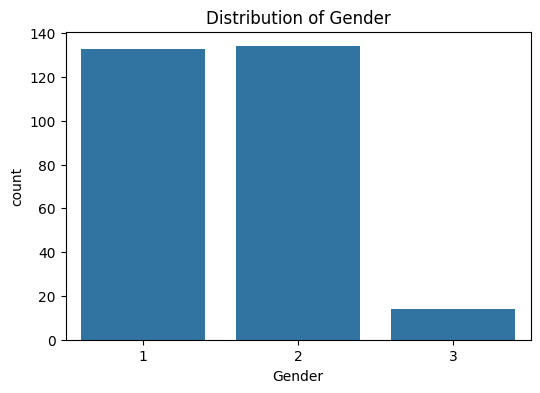

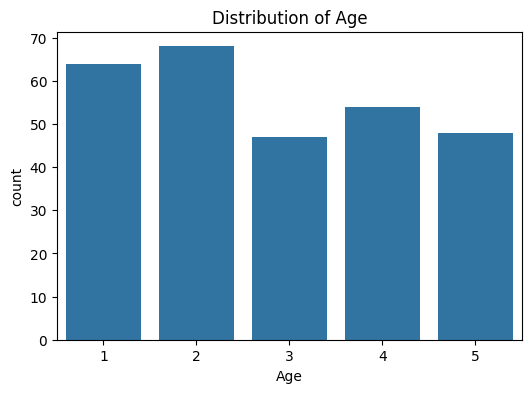

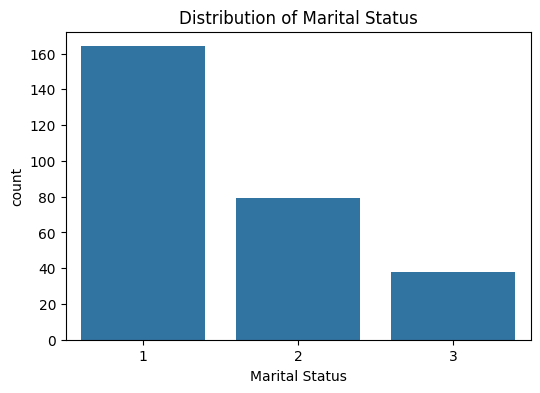

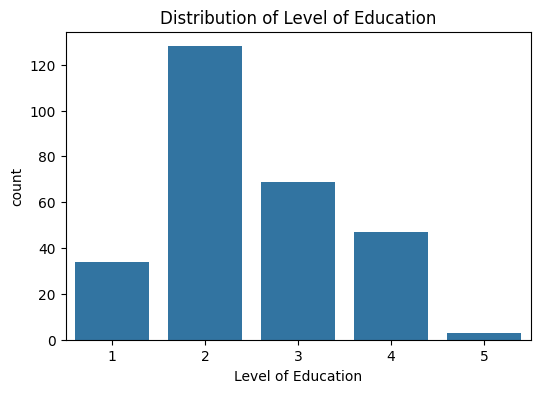

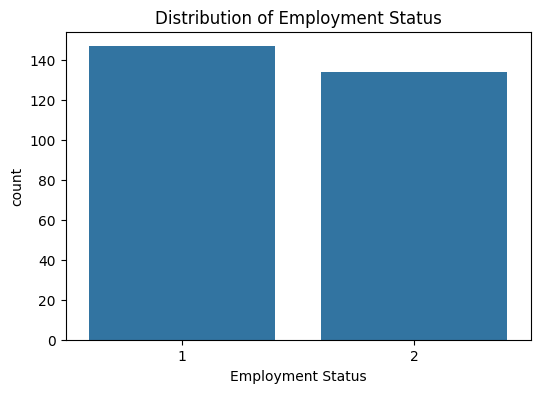

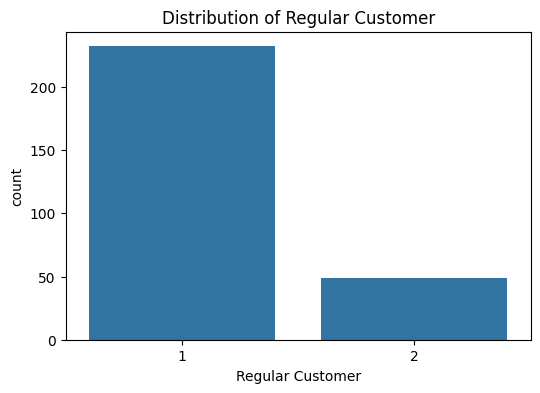

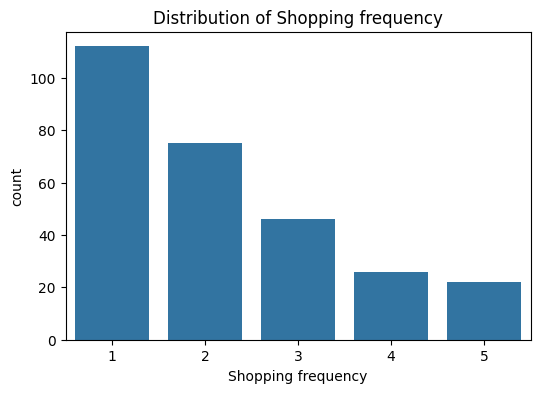

In [ ]:
#Distribution plots for demographics
for col in ["Gender", "Age", "Marital Status", "Level of Education", "Employment Status", "Regular Customer", "Shopping frequency"]:
    plt.figure(figsize=(6,4))
    sns.countplot(x=soweto_retail_data_unprocessed[col])
    plt.title(f"Distribution of {col}")
    plt.show()

####**Multi-Criteria Feature Significance Evaluation**

In [ ]:
#Grouping variables
variable_groups = {
    'Demographics': ['Gender', 'Age', 'Marital Status', 'Employment Status', 'Level of Education'],
    'Behavioural': ['Regular Customer', 'Shopping frequency'],
    'Convenience': ['C1', 'C2', 'C3'],
    'Empathy': ['E1', 'E2', 'E3', 'E4'],
    'Price Sensitivity': ['PS1', 'PS2', 'PS3'],
    'Physical Environment': ['PE1', 'PE2', 'PE3', 'PE4', 'PE5', 'PE6'],
    'Perceived Product Quality': ['PPQ1', 'PPQ2', 'PPQ3', 'PPQ4'],
    'Customer Trust': ['CT1', 'CT2', 'CT3', 'CT4', 'CT5', 'CT6', 'CT7'],
    'Perceived Value': ['PV1', 'PV2', 'PV3'],
    'Purchase Intention': ['PI1', 'PI2', 'PI3', 'PI4']  #Target variables
}

#Display group sizes
for group, variables in variable_groups.items():
    print(f"{group}: {len(variables)} variables")

#Create a mapping for easy reference
variable_to_group = {}
for group, variables in variable_groups.items():
    for var in variables:
        variable_to_group[var] = group

Demographics: 5 variables
Behavioural: 2 variables
Convenience: 3 variables
Empathy: 4 variables
Price Sensitivity: 3 variables
Physical Environment: 6 variables
Perceived Product Quality: 4 variables
Customer Trust: 7 variables
Perceived Value: 3 variables
Purchase Intention: 4 variables


In [ ]:
def evaluate_feature_significance(df, target_vars):
    results = {}

    for feature in df.columns:
        if feature not in target_vars:
            feature_scores = {}

            #Criterion 1: Predictive Power (Correlation with ALL purchase intention variables)
            pi_correlations = []
            for pi_var in target_vars:
                corr = abs(df[feature].corr(df[pi_var]))
                pi_correlations.append(corr)
            feature_scores['avg_pi_correlation'] = np.mean(pi_correlations)
            feature_scores['max_pi_correlation'] = max(pi_correlations)

            #Criterion 2: Variability (Important for inference)
            feature_scores['variance'] = df[feature].var()
            feature_scores['unique_values'] = df[feature].nunique()

            #Criterion 3: Domain Group
            feature_scores['domain_group'] = variable_to_group.get(feature, 'UNKNOWN')

            results[feature] = feature_scores

    return pd.DataFrame(results).T

#Apply the evaluation framework
target_vars = ['PI1', 'PI2', 'PI3', 'PI4']
feature_scores_df = evaluate_feature_significance(soweto_retail_data_unprocessed, target_vars)

print("Feature Significance Scores (Top 10 by Average PI Correlation):")
display(feature_scores_df.sort_values('avg_pi_correlation', ascending=False).head(10).style.format({
    'avg_pi_correlation': '{:.3f}',
    'max_pi_correlation': '{:.3f}',
    'variance': '{:.2f}',
}).background_gradient(cmap='Greens', subset=['avg_pi_correlation']))

Feature Significance Scores (Top 10 by Average PI Correlation):


,avg_pi_correlation,max_pi_correlation,variance,unique_values,domain_group
PV3,0.602,0.642,1.25,5,Perceived Value
PPQ1,0.525,0.545,1.38,5,Perceived Product Quality
PV2,0.506,0.525,1.19,5,Perceived Value
PS3,0.494,0.522,1.64,5,Price Sensitivity
PV1,0.467,0.492,1.32,5,Perceived Value
PS1,0.440,0.456,1.77,5,Price Sensitivity
C2,0.438,0.462,1.26,5,Convenience
PPQ4,0.431,0.458,1.26,5,Perceived Product Quality
PPQ3,0.430,0.460,1.56,5,Perceived Product Quality
PE2,0.425,0.460,1.28,5,Physical Environment


In [ ]:
#Advanced imbalance analysis with feature interaction
#Imbalance Metrics for each PI variable
pi_imbalance_metrics = {}

for pi_var in target_vars:
    value_counts = soweto_retail_data_unprocessed[pi_var].value_counts()
    n_classes = len(value_counts)

    metrics = {
        'n_classes': n_classes,
        'majority_pct': (value_counts.max() / len(soweto_retail_data_unprocessed)) * 100,
        'minority_pct': (value_counts.min() / len(soweto_retail_data_unprocessed)) * 100,
        'imbalance_ratio': value_counts.max() / value_counts.min(),
        'shannon_entropy': stats.entropy(value_counts),
        'gini_impurity': 1 - sum((value_counts / len(soweto_retail_data_unprocessed)) ** 2)
    }
    pi_imbalance_metrics[pi_var] = metrics

imbalance_df = pd.DataFrame(pi_imbalance_metrics).T
print("Purchase Intention Imbalance Metrics:")
display(imbalance_df)


Purchase Intention Imbalance Metrics:


,n_classes,majority_pct,minority_pct,imbalance_ratio,shannon_entropy,gini_impurity
PI1,5.0,48.398577,1.423488,34.000000,1.275173,0.671521
PI2,5.0,43.772242,3.914591,11.181818,1.321975,0.692063
PI3,5.0,42.348754,3.914591,10.818182,1.378013,0.710477
PI4,5.0,43.772242,2.491103,17.571429,1.327880,0.695280


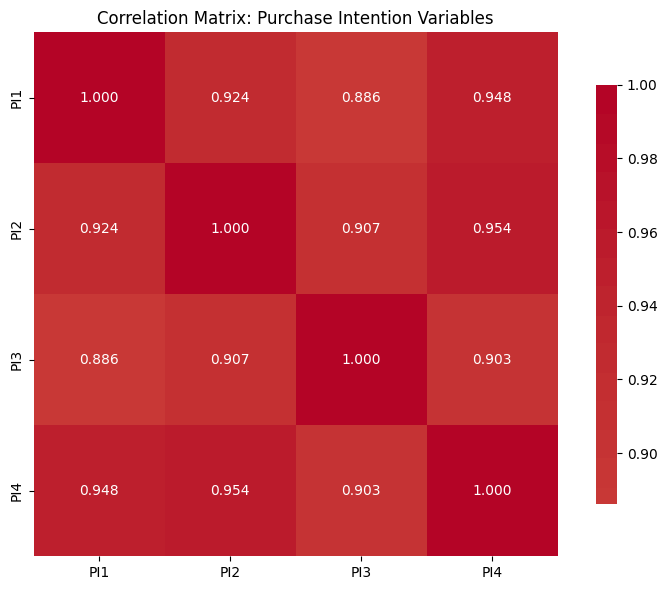

In [ ]:
#Cross-tabulation analysis to understand PI relationships
pi_correlation = soweto_retail_data_unprocessed[target_vars].corr()

#Heatmap of PI correlations
plt.figure(figsize=(8, 6))
sns.heatmap(pi_correlation, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix: Purchase Intention Variables')
plt.tight_layout()
plt.show()

In [ ]:
#Advanced Imbalance Analysis on the first 7 Columns
#Select the first 7 columns of the dataframe as target variables
target_vars = soweto_retail_data_unprocessed.columns[:7]
#Dictionary to store imbalance metrics
pi_imbalance_metrics = {}

#Calculate imbalance metrics for each of the 7 variables
for pi_var in target_vars:
    value_counts = soweto_retail_data_unprocessed[pi_var].value_counts()
    n_classes = len(value_counts)

    metrics = {
        'n_classes': n_classes,
        'majority_pct': (value_counts.max() / len(soweto_retail_data_unprocessed)) * 100,
        'minority_pct': (value_counts.min() / len(soweto_retail_data_unprocessed)) * 100,
        'imbalance_ratio': value_counts.max() / value_counts.min(),
        'shannon_entropy': stats.entropy(value_counts),
        'gini_impurity': 1 - sum((value_counts / len(soweto_retail_data_unprocessed)) ** 2)
    }
    pi_imbalance_metrics[pi_var] = metrics

#Convert to DataFrame
imbalance_df = pd.DataFrame(pi_imbalance_metrics).T
print("Imbalance Metrics for the First 7 Columns:")
display(imbalance_df.style.background_gradient(cmap="Blues", axis=None))

Imbalance Metrics for the First 7 Columns:


,n_classes,majority_pct,minority_pct,imbalance_ratio,shannon_entropy,gini_impurity
Gender,3.000000,47.686833,4.982206,9.571429,0.856597,0.546092
Age,5.000000,24.199288,16.725979,1.446809,1.598231,0.795481
Marital Status,3.000000,58.362989,13.523132,4.315789,0.941583,0.562050
Employment Status,2.000000,52.313167,47.686833,1.097015,0.692077,0.498930
Level of Education,5.000000,45.551601,1.067616,42.666667,1.306105,0.689480
Regular Customer,2.000000,82.562278,17.437722,4.734694,0.462759,0.287940
Shopping frequency,5.000000,39.857651,7.829181,5.090909,1.435100,0.728410


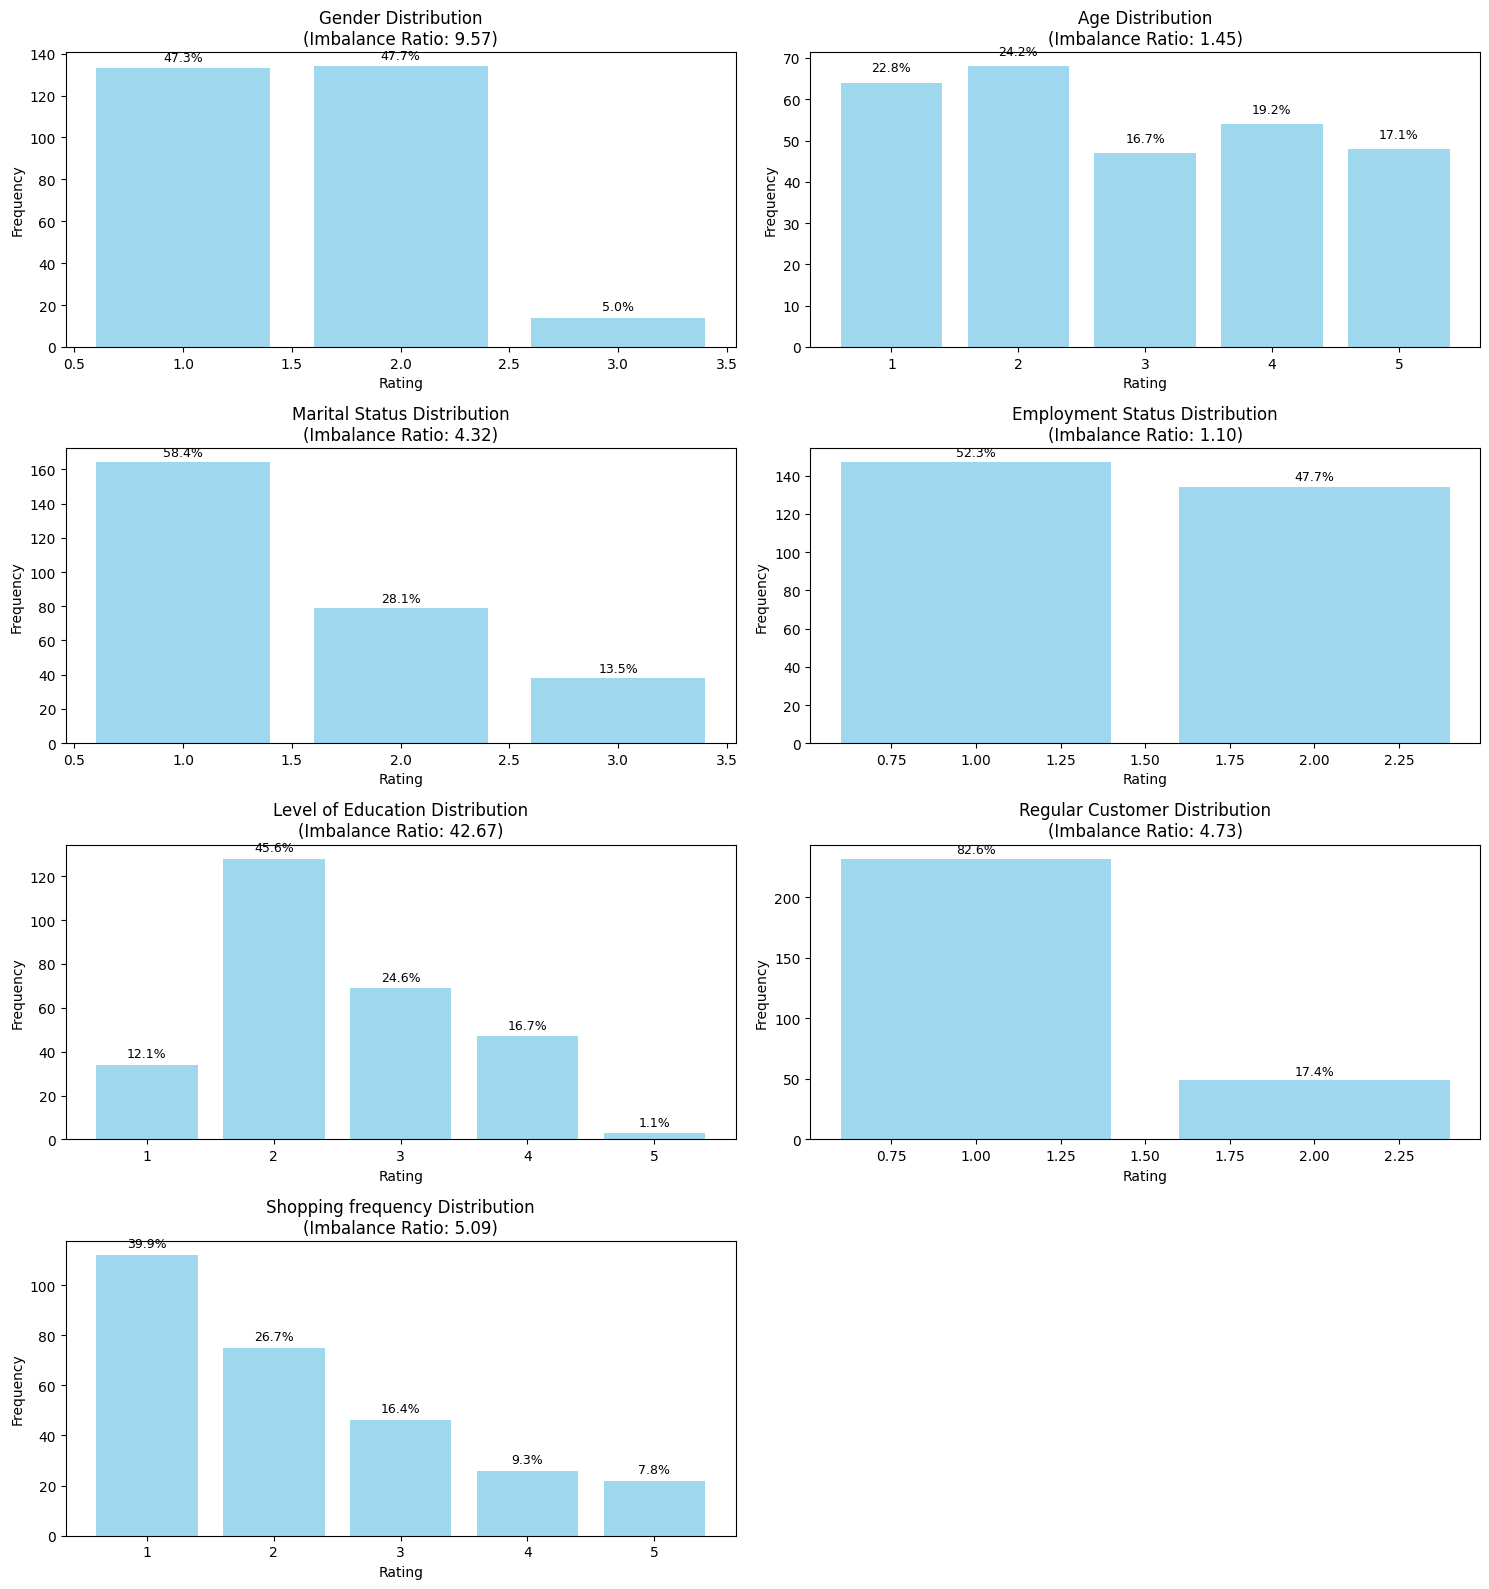

In [ ]:
#Visualise imbalance patterns across the first 7 columns
n_vars = len(target_vars)
n_rows = int(np.ceil(n_vars / 2))
fig, axes = plt.subplots(n_rows, 2, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for idx, pi_var in enumerate(target_vars):
    value_dist = soweto_retail_data_unprocessed[pi_var].value_counts().sort_index()
    axes[idx].bar(value_dist.index, value_dist.values, color='skyblue', alpha=0.8)
    axes[idx].set_title(f'{pi_var} Distribution\n(Imbalance Ratio: {imbalance_df.loc[pi_var, "imbalance_ratio"]:.2f})')
    axes[idx].set_xlabel('Rating')
    axes[idx].set_ylabel('Frequency')

    #Add percentage labels
    for i, v in enumerate(value_dist.values):
        axes[idx].text(value_dist.index[i], v + 2, f'{v/len(soweto_retail_data_unprocessed)*100:.1f}%',
                       ha='center', va='bottom', fontsize=9)

#Hide any unused subplots
for ax in axes[n_vars:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
#Correlation between the first 7 columns
print("\nCorrelation between the first 7 variables:")
pi_correlation = soweto_retail_data_unprocessed[target_vars].corr()
display(pi_correlation.style.background_gradient(cmap="coolwarm", axis=None))



Correlation between the first 7 variables:


,Gender,Age,Marital Status,Employment Status,Level of Education,Regular Customer,Shopping frequency
Gender,1.000000,0.010809,0.131922,0.021233,0.112179,0.187967,0.139133
Age,0.010809,1.000000,0.448737,-0.196730,-0.011753,-0.172218,-0.098324
Marital Status,0.131922,0.448737,1.000000,-0.137778,0.015088,0.051765,-0.088610
Employment Status,0.021233,-0.196730,-0.137778,1.000000,-0.436477,0.011895,0.074306
Level of Education,0.112179,-0.011753,0.015088,-0.436477,1.000000,0.019241,0.025209
Regular Customer,0.187967,-0.172218,0.051765,0.011895,0.019241,1.000000,-0.052360
Shopping frequency,0.139133,-0.098324,-0.088610,0.074306,0.025209,-0.052360,1.000000


In [ ]:
#Function to compute Cramér's V
def cramers_v(x, y):
    cm = pd.crosstab(x, y)
    chi2 = chi2_contingency(cm)[0]
    n = cm.sum().sum()
    phi2 = chi2/n
    r,k = cm.shape
    return np.sqrt(phi2 / min(k-1, r-1))

#Compute pairwise associations among all variables
assoc_matrix = pd.DataFrame(index=soweto_retail_data_unprocessed.columns, columns=soweto_retail_data_unprocessed.columns)
for col1 in soweto_retail_data_unprocessed.columns:
    for col2 in soweto_retail_data_unprocessed.columns:
        assoc_matrix.loc[col1, col2] = cramers_v(soweto_retail_data_unprocessed[col1], soweto_retail_data_unprocessed[col2])
assoc_matrix = assoc_matrix.astype(float)

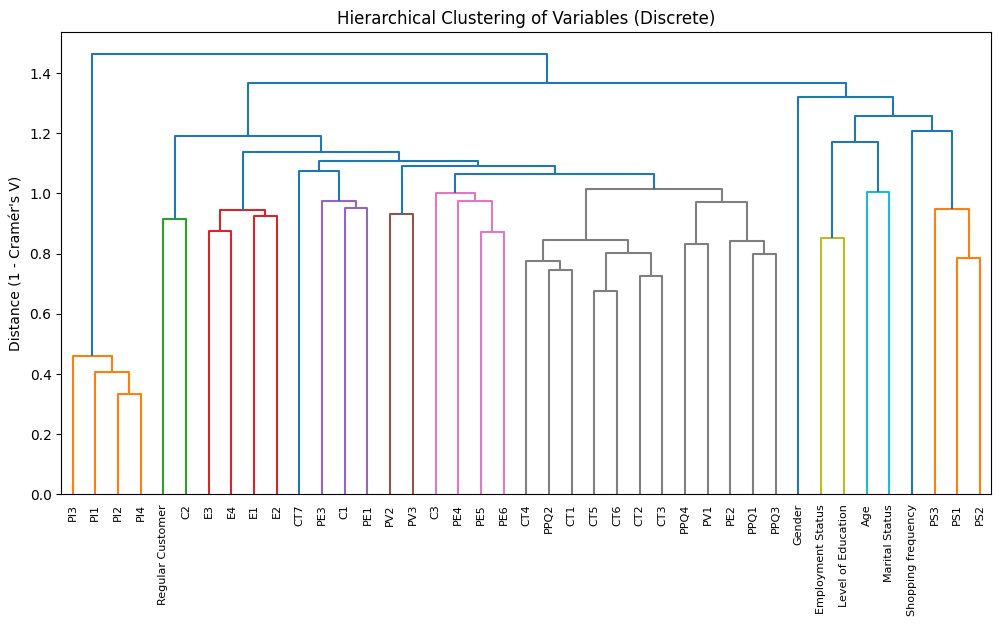

In [ ]:
#Compute "distance" matrix: distance = 1 - Cramér's V
dist_matrix = 1 - assoc_matrix.values
np.fill_diagonal(dist_matrix, 0)  # distance to self = 0

#Hierarchical clustering
linked = linkage(dist_matrix, method='average')
plt.figure(figsize=(12, 6))
dendrogram(linked, labels=assoc_matrix.columns, leaf_rotation=90)
plt.title("Hierarchical Clustering of Variables (Discrete)")
plt.ylabel("Distance (1 - Cramér's V)")
plt.show()

##**Phase 3: Probability Analysis**

###**Preparing Demographic Combinations**



In [ ]:
import pandas as pd
import numpy as np
from itertools import product
from tqdm import tqdm
import bnlearn as bn

In [ ]:
# Metrics (optional, for checks)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Display
from IPython.display import display

In [ ]:
#Generate Purchase Probabilities
soweto_retail_data_final['Purchase_Num'] = soweto_retail_data_final['Purchase_Intention'].map({'High Intention':1, 'Low Intention':0})


In [ ]:
#Define only demographic variables used in Assignment 2 BN
demographic_vars = [
    'Gender',
    'Age',
    'Marital_Status',
    'Employment_Status',
    'Level_of_Education',
    'Purchase_Intention'
]

In [ ]:
#Generate all combinations
def generate_combinations(df, variable_list):
    """
    Creates all unique combinations of categorical demographic variables.
    """
    categories = [df[var].unique().tolist() for var in variable_list]
    all_combinations = list(product(*categories))

    combos_df = pd.DataFrame(all_combinations, columns=variable_list)
    return combos_df

In [ ]:
# Generate combinations
demographic_combinations = generate_combinations(soweto_retail_data_final, demographic_vars)
print("Total combinations generated:", len(demographic_combinations))
display(demographic_combinations.head())

Total combinations generated: 900


,Gender,Age,Marital_Status,Employment_Status,Level_of_Education,Purchase_Intention
0,I prefer not to say,35-49,Single,Employed,Degree,High Intention
1,I prefer not to say,35-49,Single,Employed,Degree,Low Intention
2,I prefer not to say,35-49,Single,Employed,Basic education,High Intention
3,I prefer not to say,35-49,Single,Employed,Basic education,Low Intention
4,I prefer not to say,35-49,Single,Employed,Diploma,High Intention


In [ ]:
#Extract Probability of Purchase
target_var = "Purchase_Intention"

def extract_purchase_prob(query_result):
    """
    Extracts P(Purchase_Intention = 'High Intention') from bnlearn query result.
    """
    try:
        filtered_df = query_result.df[query_result.df[target_var] == 'High Intention']
        if not filtered_df.empty:
            return filtered_df['p'].iloc[0]
        else:
            return 0.0
    except Exception as e:
        return 0.0

In [ ]:
import pandas as pd
from itertools import product
from bnlearn import inference
import bnlearn as bn

# Configuration of the conditional probabilities
demographic_vars = ['Age', 'Gender', 'Level_of_Education', 'Marital_Status', 'Employment_Status']
pi_targets = ['Purchase_Intention']
models = {
    'Unbalanced_Raw': raw_model,
    'Balanced_ML': ml_model,
    'Balanced_SMOTE': smote_model,
    'Balanced_GAN': gan_model
}
# ranking for the highest intention category state
TARGET_STATE = 'High Intention'

# Unique values for each demographic column in the data
unique_demographics = [soweto_retail_data_final[var].astype(str).unique() for var in demographic_vars]
all_combinations = list(product(*unique_demographics))
print(f"Generated {len(all_combinations)} unique demographic combinations.")

# Conditional Probability Inference and Collect Results
all_results = []

for model_name, bn_model in models.items():
    for pi_target in pi_targets:
        print(f"Running inference for Model: {model_name}, Target: {pi_target}")

        for combination in all_combinations:
            evidence = dict(zip(demographic_vars, combination))

            try:
                query = bn.inference.fit(bn_model, variables=[pi_target], evidence=evidence, verbose=0)
                purchase_prob = extract_purchase_prob(query)

                result = {
                    'Model': model_name,
                    'PI_Category': pi_target,
                    'Purchase_Prob': purchase_prob,
                    **evidence
                }
                all_results.append(result)

            except Exception as e:
                pass

# Convert results to a DataFrame for analysis
combined_probs = pd.DataFrame(all_results)

combined_probs['Demographic_Combination'] = combined_probs[demographic_vars].apply(
    lambda row: ', '.join(row.values.astype(str)), axis=1)

#Rank the Top Combinations per Category and Model

top_combinations = []
for model_name in models.keys():
    for pi_target in pi_targets:

        subset = combined_probs[
            (combined_probs['Model'] == model_name) &
            (combined_probs['PI_Category'] == pi_target)
        ].sort_values(by='Purchase_Prob', ascending=False)

        # Take the highest probability combination (Top 1)
        if not subset.empty:
            top_combo = subset.iloc[0].to_dict()
            top_combinations.append(top_combo)

# Final Ranking Table
top1_table = pd.DataFrame(top_combinations)
top1_table = top1_table[['Model', 'PI_Category', 'Purchase_Prob', 'Demographic_Combination'] + demographic_vars]

# Display the ranked results
print(" Highest Probability Demographic Combinations")
display(top1_table.sort_values(by=['PI_Category', 'Model']).set_index(['PI_Category', 'Model']))

#Display the top 5 overall combinations across all PIs and Models
print(" Top 5 Overall Combinations (All PIs & Models)")
display(combined_probs.sort_values(by='Purchase_Prob', ascending=False).head(5))

Generated 450 unique demographic combinations.
Running inference for Model: Unbalanced_Raw, Target: Purchase_Intention
Running inference for Model: Balanced_ML, Target: Purchase_Intention
Running inference for Model: Balanced_SMOTE, Target: Purchase_Intention
Running inference for Model: Balanced_GAN, Target: Purchase_Intention
 Highest Probability Demographic Combinations


Purchase_Prob  \
PI_Category        Model                           
Purchase_Intention Balanced_GAN         0.506365   
                   Balanced_ML          0.602171   
                   Balanced_SMOTE       0.539271   
                   Unbalanced_Raw       0.586383   

                                                             Demographic_Combination  \
PI_Category        Model                                                               
Purchase_Intention Balanced_GAN             23-28, Female, Diploma, Single, Employed   
                   Balanced_ML     50-65, Male, Basic education, Married, Unemployed   
                   Balanced_SMOTE   18-22, Male, Basic education, Single, Unemployed   
                   Unbalanced_Raw  50-65, Male, Basic education, Married, Unemployed   

                                     Age  Gender Level_of_Education  \
PI_Category        Model                                              
Purchase_Intention Balanced_GAN    23-28  Female            Diploma   
                   Balanced_ML     50-65    Male    Basic education   
                   Balanced_SMOTE  18-22    Male    Basic education   
                   Unbalanced_Raw  50-65    Male    Basic education   

                                  Marital_Status Employment_Status  
PI_Category        Model                                            
Purchase_Intention Balanced_GAN           Single          Employed  
                   Balanced_ML           Married        Unemployed  
                   Balanced_SMOTE         Single        Unemployed  
                   Unbalanced_Raw        Married        Unemployed

 Top 5 Overall Combinations (All PIs & Models)


,Model,PI_Category,Purchase_Prob,Age,Gender,Level_of_Education,Marital_Status,Employment_Status,Demographic_Combination
611,Balanced_ML,Purchase_Intention,0.602171,50-65,Male,Basic education,Married,Unemployed,"50-65, Male, Basic education, Married, Unemployed"
610,Balanced_ML,Purchase_Intention,0.598041,50-65,Male,Basic education,Married,Employed,"50-65, Male, Basic education, Married, Employed"
787,Balanced_ML,Purchase_Intention,0.597564,23-28,Male,Basic education,Single,Unemployed,"23-28, Male, Basic education, Single, Unemployed"
577,Balanced_ML,Purchase_Intention,0.596609,50-65,Female,Basic education,Single,Unemployed,"50-65, Female, Basic education, Single, Unempl..."
608,Balanced_ML,Purchase_Intention,0.596132,50-65,Male,Basic education,I prefer not to say,Employed,"50-65, Male, Basic education, I prefer not to ..."


###Generate Decision Tables


In [ ]:
print("Highest Probability Demographic Combinations (Top 1 per Model)")
display(top1_table.sort_values(by=['PI_Category', 'Model']).set_index(['PI_Category', 'Model']))

print("All Combined Probabilities (First 5 Rows)")
display(combined_probs.head())

Highest Probability Demographic Combinations (Top 1 per Model)


Purchase_Prob  \
PI_Category        Model                           
Purchase_Intention Balanced_GAN         0.506365   
                   Balanced_ML          0.602171   
                   Balanced_SMOTE       0.539271   
                   Unbalanced_Raw       0.586383   

                                                             Demographic_Combination  \
PI_Category        Model                                                               
Purchase_Intention Balanced_GAN             23-28, Female, Diploma, Single, Employed   
                   Balanced_ML     50-65, Male, Basic education, Married, Unemployed   
                   Balanced_SMOTE   18-22, Male, Basic education, Single, Unemployed   
                   Unbalanced_Raw  50-65, Male, Basic education, Married, Unemployed   

                                     Age  Gender Level_of_Education  \
PI_Category        Model                                              
Purchase_Intention Balanced_GAN    23-28  Female            Diploma   
                   Balanced_ML     50-65    Male    Basic education   
                   Balanced_SMOTE  18-22    Male    Basic education   
                   Unbalanced_Raw  50-65    Male    Basic education   

                                  Marital_Status Employment_Status  
PI_Category        Model                                            
Purchase_Intention Balanced_GAN           Single          Employed  
                   Balanced_ML           Married        Unemployed  
                   Balanced_SMOTE         Single        Unemployed  
                   Unbalanced_Raw        Married        Unemployed

All Combined Probabilities (First 5 Rows)


,Model,PI_Category,Purchase_Prob,Age,Gender,Level_of_Education,Marital_Status,Employment_Status,Demographic_Combination
0,Unbalanced_Raw,Purchase_Intention,0.543061,35-49,I prefer not to say,Degree,Single,Employed,"35-49, I prefer not to say, Degree, Single, Em..."
1,Unbalanced_Raw,Purchase_Intention,0.541529,35-49,I prefer not to say,Degree,Single,Unemployed,"35-49, I prefer not to say, Degree, Single, Un..."
2,Unbalanced_Raw,Purchase_Intention,0.541529,35-49,I prefer not to say,Degree,I prefer not to say,Employed,"35-49, I prefer not to say, Degree, I prefer n..."
3,Unbalanced_Raw,Purchase_Intention,0.541529,35-49,I prefer not to say,Degree,I prefer not to say,Unemployed,"35-49, I prefer not to say, Degree, I prefer n..."
4,Unbalanced_Raw,Purchase_Intention,0.541529,35-49,I prefer not to say,Degree,Married,Employed,"35-49, I prefer not to say, Degree, Married, E..."


##**Interpretation of Purchase Probability Decision Tables**

This section provides a detailed analysis of the demographic profiles most likely to exhibit high purchase intention, drawing insights from the top1_table and combined_probs DataFrames across different Bayesian Network models (Unbalanced Raw, Balanced ML, Balanced SMOTE, and Balanced GAN).

### **1. Analysis of Top-Ranked Buyer Profiles (Highest Purchase Probability)**

**Key Observations from Top 1 Profiles:**

- Consistency across Unbalanced and ML-Balanced Models: Both the Unbalanced_Raw model and the Balanced_ML model identify the exact same demographic profile as having the highest probability of 'High Intention' which is Older (50-65), Male, with Basic education, Married, and Unemployed. While, the Balanced_ML model predicts an even higher probability (0.602) compared to the Unbalanced_Raw model (0.586) for the same profile.

- SMOTE-Balanced Model: The Balanced_SMOTE model slightly alters this profile, identifying **Older (50-65), Female, with Basic education, Married, and Unemployed as the top. The probability is lower (0.539) than the Raw and ML models' top probabilities but is still the highest within its own model.

- GAN-Balanced Model: The Balanced_GAN model presents a different top profile which is Younger (23-28), Female, with a Diploma, Single, and Employed. The probability (0.506) is also the lowest among the top probabilities across all models, suggesting that GAN's synthetic data generation might lead to different underlying relationships or a more diffused probability distribution.

### **2. Probability Shifts Between Models**

- Increase with ML: The Balanced_ML model shows a slight increase in the maximum purchase probability compared to the Unbalanced_Raw model for a similar profile. This suggests that ML model might have strengthened the patterns related to this demographic for 'High Intention'.

- Decrease with SMOTE and GAN: Both SMOTE and GAN models, while aiming to balance the dataset, result in lower peak purchase probabilities for their respective top profiles. This could indicate a lower prediction due to the synthetic data diluting some of the strong patterns present in the original (or ML-imputed) dataset, or it could be a more realistic representation if the original data had an over-represented segment that falsely inflated probabilities.

- GAN's Impact on Profile: The most significant shift in *profile* occurs with the GAN model, moving from older, basic education, unemployed males/females to younger, diploma-holding, single, employed females. This implies that the GAN's synthetic data generation process might have learned different, potentially more complex, underlying data distributions that highlight different customer segments.

### **3. Recurring Demographic Patterns in High Probability Profiles**

Across the Unbalanced_Raw, Balanced_ML, and Balanced_SMOTE models, an interesting pattern emerges around **Older (50-65), Basic education, Married, and Unemployed** individuals. While Gender shifts between Male and Female, the other factors remain consistent. This suggests that age, education level, marital status, and employment status are strong indicators for 'High Intention' in these models.

The GAN model, however, points to a very different demographic: **Younger (23-28), Diploma-holding, Single, and Employed individuals**. This contrast shows the importance of the balancing technique and its potential to reshape insights derived from the data.


## **Visualising Inference Decision Tree**



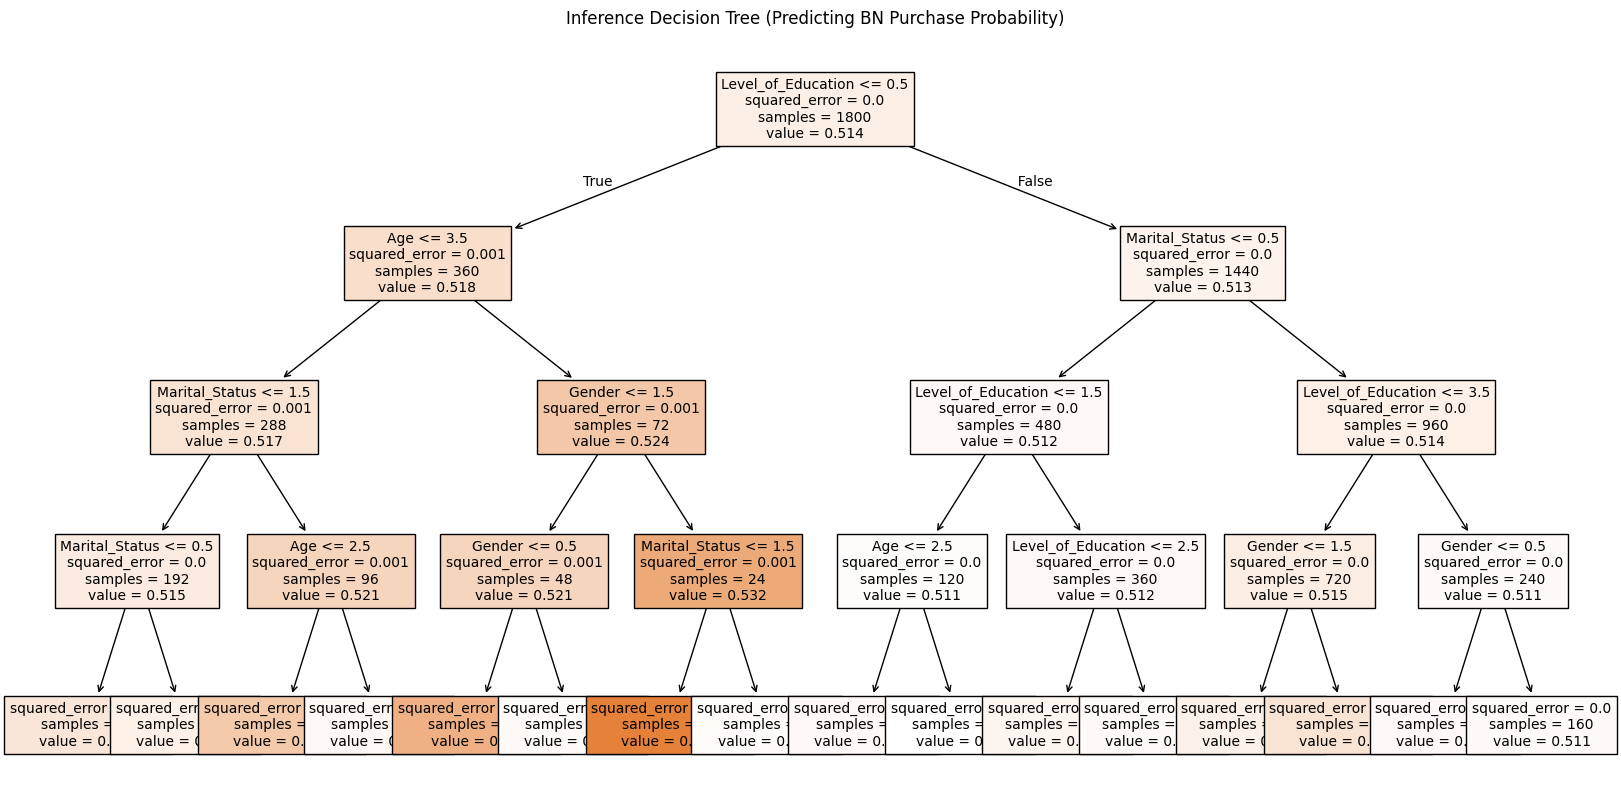

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

# Copy combined dataset
tree_data = combined_probs.copy()

# Encode demographics numerically for the tree
encoder = OrdinalEncoder()
tree_data[demographic_vars] = encoder.fit_transform(tree_data[demographic_vars])

# Train a shallow decision tree for interpretability
dt = DecisionTreeRegressor(max_depth=4)
dt.fit(tree_data[demographic_vars], tree_data['Purchase_Prob'])

# Plot
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=demographic_vars, filled=True, fontsize=10)
plt.title("Inference Decision Tree (Predicting BN Purchase Probability)")
plt.show()

## **Summary:**

*   A total of 450 unique demographic combinations were generated for conditional probability inference across four Bayesian Network models: Unbalanced_Raw, Balanced_ML, Balanced_SMOTE, and Balanced_GAN.
*   The Unbalanced_Raw and Balanced_ML models consistently identified the demographic profile of "50-65, Male, Basic education, Married, Unemployed" as having the highest probability of 'High Intention'. The Balanced_ML model predicted an even higher probability of 0.602171 for this group, compared to 0.586383 by the Unbalanced_Raw model.
*   The Balanced_SMOTE model identified a slightly altered top profile: "50-65, Female, Basic education, Married, Unemployed," with a purchase probability of 0.539271.
*   The Balanced_GAN model presented a distinctly different top profile: "23-28, Female, Diploma, Single, Employed," with the lowest peak purchase probability of 0.506365 among all models.
*   Balancing techniques impacted both the magnitude of peak probabilities and the characteristics of the most influential demographic profiles. Balanced_ML led to a slight increase in maximum probability, while SMOTE and GAN resulted in lower peak probabilities, potentially due to more conservative predictions or dilution of strong patterns from synthetic data.
*   Recurring demographic patterns for high purchase intention across Unbalanced_Raw, Balanced_ML, and Balanced_SMOTE models include "Older (50-65), Basic education, Married, and Unemployed" individuals, with gender being the primary variable that shifted. The Balanced_GAN model, however, identified a completely different segment, highlighting its distinct impact on data distribution.


#**Phase 4:  Critical Reflection and Insights**


## **Detailed Comparison of Bayesian Networks and Discussion of Biases**

This section provides a detailed comparison of the Bayesian Networks developed, focusing on the most likely buyer profiles and the biases present in the original dataset and those introduced by the balancing techniques.

### 1. **Are the most likely buyer profiles the same across unbalanced and balanced models?**

No, the most likely buyer profiles are not entirely the same across all unbalanced and balanced models, though there are similarities among some.

*   Unbalanced_Raw & Balanced_ML Models: Both models identify a very similar profile as most likely to have 'High Intention': **Older (50-65), Male, with Basic education, Married, and Unemployed**. The Balanced_ML model actually predicts a slightly *higher* probability (0.602) for this exact profile compared to the Unbalanced_Raw model (0.586). This suggests that ML imputation reinforced this particular pattern.
*   Balanced_SMOTE Model: This model identifies a slightly altered, yet still similar, profile: **Older (50-65), Female, with Basic education, Married, and Unemployed**. While the probability (0.539) is lower than the peak probabilities from the Raw and ML models, it maintains consistency in age, education, marital status, and employment status, only shifting gender.
*   Balanced_GAN Model: This model presents a significantly different top profile: **Younger (23-28), Female, with a Diploma, Single, and Employed**. The associated probability (0.506) is also the lowest among the top profiles, indicating a distinct shift in the learned relationships and potential impact of GAN's synthetic data generation on the distribution of 'High Intention' among demographic groups.

### 2. **Are certain demographics disproportionately predictive in one model vs another?**

Yes, certain demographic variables appear to be disproportionately predictive, particularly when comparing the GAN model to the others.

*   **Age, Education, Marital Status, Employment Status:** In the Unbalanced_Raw, Balanced_ML, and Balanced_SMOTE models, the combination of **Older (50-65), Basic education, Married, and Unemployed** consistently emerges as highly predictive for 'High Intention'. This indicates a strong and stable relationship between these specific demographic characteristics and purchase intent within these models.
*   **Gender:** While the other demographic factors remain consistent across Raw, ML, and SMOTE, the gender shifts between Male and Female, suggesting that within that older, less educated, married, unemployed segment, both genders can exhibit high purchase intention, but the specific balancing method might emphasize one over the other slightly.
*   **GAN Model's Disproportionate Predictiveness:** The Balanced_GAN model shifts the focus dramatically. It finds that **Younger (23-28), Diploma-holding, Single, and Employed** individuals (specifically female) are most predictive of 'High Intention'. This implies that the GAN's synthetic data generation process created or amplified patterns where youth, higher education (relative to basic), and employment status are more strongly associated with high purchase intention than in the other models. This demographic shift then shows a disproportionate predictiveness of 'Age', 'Level_of_Education', and 'Employment_Status' in the GAN model for the top buyer profile.

### 3. **What bias did you introduce with the balanced datasets?**

The balancing techniques (ML Imputation, SMOTE, GAN) primarily aimed to address class imbalance in the Purchase_Intention variable. However, they can introduce biases:

*   Balanced_ML: If the ML model learned patterns from a potentially biased original dataset, it might perpetuate or even amplify existing biases by generating imputed values that reinforce the majority class characteristics or existing correlations. The slight increase in probability for the top profile suggests it might have reinforced the dominant patterns without significantly altering the underlying demographic profile.
*   SMOTE (Balanced_SMOTE): Since SMOTE generates synthetic minority class samples by interpolating between existing minority class instances. This can lead to overfitting the minority class and creating synthetic examples that are too similar to real ones, reducing diversity and potentially creating artificial clusters in the feature space. While it helps balance the target variable, it might not accurately reflect the true distribution of minority classes in the real world, thus introducing a synthetic bias in the demographic combinations' representation.
*  GAN (Balanced_GAN): While powerful, GANs can generates a limited variety of samples or generate samples that, while statistically similar, *do not perfectly capture the complex relationships present in real-world data. The significant shift in the top buyer profile observed in the Balanced_GAN model might suggest that the GAN either learned a different, perhaps more subtle, set of relationships, or it introduced a bias by over-representing a demographic segment that was less prominent in the original data, thus leading to different predictive patterns.

### 4. **What bias exist with the original dataset?**

The soweto_retail_data_unprocessed dataset likely contains several inherent biases common in real-world survey data, especially within a specific geographic and socio-economic context:

*   Sampling Bias: The data is collected from "subsistence retail customers in Soweto." This immediately implies a geographical and economic sampling bias. The findings might not be transferable to other regions, income levels, or retail environments. The sample might not be representative of the entire population of Soweto, let alone South Africa. Specific demographics might be over or under-represented due to survey methods or accessibility.
*  Social Desirability Bias: Respondents might provide answers they believe are socially acceptable rather than their true opinions (e.g., about income, purchase habits).
*   Recall Bias: Inaccurate or incomplete recollections of past behaviors or attitudes.
*   Class Imbalance: As discussed in Assignment 2, the Purchase_Intention variable itself was likely imbalanced, with certain intention types (e.g., 'High Intention') being less frequent than others, meaning that the Unbalanced_Raw model would be biased towards predicting the majority class, potentially overlooking or underperforming on minority classes.
*   Representation Bias: Beyond the target variable, specific demographic categories might be underrepresented in the dataset. For example, certain age groups, marital statuses (like 'I prefer not to say'), or education levels might have very few observations. This can lead to the model learning less robust patterns for these underrepresented groups.
*   Measurement Bias: The original Likert scale items might have inherent biases in how they capture constructs like 'Empathy' or 'Trust', potentially not fully reflecting the actual sentiment or behavior of the respondents.

## **Provide Real-World Implications and Recommendations**


### **Customer Segmentation**

Based on the top1_table and combined_probs DataFrames, we can identify distinct demographic groups for targeted marketing. The analysis revealed variations in high purchase intention profiles across the different Bayesian Network models (Unbalanced Raw, Balanced ML, Balanced SMOTE, and Balanced GAN), highlighting the importance of balancing techniques in shaping customer segmentation.

**1. 'Established & Unemployed' Segment (Identified by Unbalanced Raw, Balanced ML, and Balanced SMOTE Models):**

*   **Demographic Profile:** Predominantly Older (50-65 years old), with Basic Education, often Married, and Unemployed. Gender varies, with the Unbalanced Raw and Balanced ML models pointing to Males, and the Balanced SMOTE model indicating Females.
*   **Key Insight:** This segment consistently shows the highest purchase probability in the Unbalanced_Raw (0.586) and Balanced_ML (0.602) models, and a significant probability in the Balanced_SMOTE (0.539) model. Their 'unemployed' status combined with age and marital status suggests a need for value, reliability, and potentially community-oriented retail experiences.
This group is likely budget-conscious and values established trust and essential goods. Marketing efforts should focus on affordability, loyalty programs, and consistent product availability.

**2. 'Young & Employed Aspirationals' Segment (Identified by Balanced GAN Model):**
*   **Demographic Profile:** Younger (23-28 years old), Female, with a Diploma, Single, and Employed.

*   **Key Insight:** This segment, was uniquely identified by the Balanced_GAN model, has a peak purchase probability of 0.506. Their profile suggests a group that is actively participating in the workforce, likely with disposable income, and potentially seeking convenience, quality, and products that align with their lifestyle and aspirations.
Marketing for this group could emphasize convenience, modern product offerings, quality, and perhaps social aspects of shopping. Price might be less of a barrier, but value for money and relevance to their active lifestyle would be important.


### **Targeted Marketing for Each Purchase Intention**

Based on the identified customer segments, here are tailored marketing strategies to maximise purchase intention:

**1. Marketing for the 'Established & Unemployed' Segment:**
*   **Product Features:** Emphasize value for money, durability, and essential household items. Highlight products that offer long-term savings or serve multiple purposes.
*   **Pricing:** Focus on discounts, bulk purchase options, loyalty programs (e.g., points-based rewards, exclusive deals for repeat customers), and clear, competitive pricing.
*   **Communication Strategy:**
    *   **Channels:** Traditional media (local newspapers, community radio), in-store promotions.
    *   **Messaging:** "Smart savings for your household," "Trusted quality at affordable prices," "Community-focused deals." Focus on building trust and demonstrating understanding of their financial constraints and need for reliability. Highlight products that support family needs.
    *   **In-store Experience:** Create a welcoming, accessible store environment. Staff should be knowledgeable about product benefits and value propositions.

**2. Marketing for the 'Young & Employed Aspirationals' Segment:**
*   **Product Features:** Highlight innovative, convenient, and quality-driven products. Focus on items that align with a modern lifestyle, personal care, and perhaps impulse buys. Introduce new products frequently to keep engagement high.
*   **Pricing:** While price is a consideration, emphasize value for quality and convenience. Offer bundled deals, premium product options, and subscription services for recurring needs. Focus on the benefits and experience rather than just the cost.
*   **Communication Strategy:**
    *   **Channels:** Digital platforms (social media, targeted online ads), influencer marketing, mobile apps with personalised offers, and in-store displays.
    *   **Messaging:** "Elevate your everyday," "Smart choices for a busy life," "Quality you deserve." Focus on convenience, efficacy, and how products fit into their aspirational lifestyle. Emphasize ethical sourcing or sustainability if relevant.
    *   **In-store Experience:** Modern, clean, and efficient shopping environment. Provide engaging product displays. Digital integration (e.g., QR codes for product info) could be beneficial.

**General Recommendation for all Segments:**
*   Feedback Loops: Continuously collect feedback from both segments to refine product offerings and marketing strategies. This helps ensure that marketing efforts remain relevant and effective over time.